<a href="https://colab.research.google.com/github/Webster-Rodrigues/Regressao_Logistica_I.A/blob/main/Regress%C3%A3o_Log%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INICIALIZAÇÃO DOS DADOS**

In [10]:
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np


base = pd.read_csv('heart_2020_cleaned.csv')

#Visualização de todas as colunas
display(base.columns)


display(base)

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


**ANÁLISE EXPLORATÓRIA**

In [11]:
#Tratamento individual das colunas

base['HeartDisease'].replace('No', "0", inplace=True)
base['HeartDisease'].replace('Yes', "1", inplace=True)

base['Smoking'].replace('No', "0", inplace=True)
base['Smoking'].replace('Yes', "1", inplace=True)

base['AlcoholDrinking'].replace('No', "0", inplace=True)
base['AlcoholDrinking'].replace('Yes', "1", inplace=True)

base['Stroke'].replace('No', "0", inplace=True)
base['Stroke'].replace('Yes', "1", inplace=True)

base['DiffWalking'].replace('No', "0", inplace=True)
base['DiffWalking'].replace('Yes', "1", inplace=True)

base['Diabetic'].replace('No', "0", inplace=True)
base['Diabetic'].replace('Yes', "1", inplace=True)
base['Diabetic'].replace('Yes (during pregnancy)', "1", inplace=True)
base['Diabetic'].replace('No, borderline diabetes', "0", inplace=True)

base['PhysicalActivity'].replace('No', "0", inplace=True)
base['PhysicalActivity'].replace('Yes', "1", inplace=True)

base['Asthma'].replace('No', "0", inplace=True)
base['Asthma'].replace('Yes', "1", inplace=True)

base['KidneyDisease'].replace('No', "0", inplace=True)
base['KidneyDisease'].replace('Yes', "1", inplace=True)

base['SkinCancer'].replace('No', "0", inplace=True)
base['SkinCancer'].replace('Yes', "1", inplace=True)

base['Sex'].replace('Female', "0", inplace=True)
base['Sex'].replace('Male', "1", inplace=True)

base['AgeCategory'].replace({'18-24': 0, '25-29': 1, '30-34': 2, '35-39': 3, '40-44': 4, '45-49': 5, '50-54' : 6,'55-59': 7,
 '60-64': 8, '65-69': 9, '70-74' : 10, '75-79' : 11,'80 or older': 12}, inplace=True)

base['Race'].replace({'White': "0", 'Black' : "1", 'Asian' : "2", 'Hispanic' : "3", 'Other' : "4",'American Indian/Alaskan Native' : "5"}, inplace=True)

base['GenHealth'].replace({'Poor': "0", 'Fair' : "1", 'Good' : "2", 'Very good' : "3", 'Excellent' : "4",}, inplace=True)

display(base)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,0,1,1,3,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,0,0,1,3,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,0,1,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,0,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,0,0,1,3,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,8,3,1,0,1,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,3,3,0,1,3,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,5,3,0,1,2,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,1,3,0,0,2,12.0,0,0,0


In [12]:
#Redução da quantidade de linhas com valor NÃO na coluna HeartDisease
linhas_infarto = base[base['HeartDisease'] == '0']
linhas_excluir = random.sample(linhas_infarto.index.tolist(), 265044)
baseReduzida_df = base.drop(linhas_excluir)
display(baseReduzida_df)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
5,1,28.87,1,0,0,6.0,0.0,1,0,11,1,0,0,1,12.0,0,0,0
10,1,34.30,1,0,0,30.0,0.0,1,1,8,0,1,0,0,15.0,1,0,0
20,0,21.16,0,0,0,0.0,0.0,0,0,12,1,0,0,2,8.0,0,0,0
31,0,30.67,0,0,0,4.0,4.0,1,0,12,0,0,1,1,8.0,1,0,0
35,1,32.98,1,0,1,10.0,0.0,1,1,11,0,1,1,0,4.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319781,1,37.12,1,0,0,0.0,0.0,0,1,3,3,0,1,3,7.0,0,0,0
319786,1,33.20,1,0,0,0.0,0.0,0,0,8,3,1,1,3,8.0,1,0,0
319788,0,23.38,0,0,0,0.0,0.0,0,0,8,3,0,1,4,6.0,0,0,0
319790,1,27.41,1,0,0,7.0,0.0,1,1,8,3,1,0,1,6.0,1,0,0


**NORMALIZAÇÃO DO DATASET**

In [13]:
#Normalização
scaler_minMax = MinMaxScaler()
baseNormalizada = pd.DataFrame(scaler_minMax.fit_transform(baseReduzida_df),columns=baseReduzida_df.columns)
#Visualização do dataset normalizado
display(baseNormalizada)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,1.0,0.204042,1.0,0.0,0.0,0.200000,0.000000,1.0,0.0,0.916667,0.2,0.0,0.0,0.25,0.478261,0.0,0.0,0.0
1,1.0,0.270545,1.0,0.0,0.0,1.000000,0.000000,1.0,1.0,0.666667,0.0,1.0,0.0,0.00,0.608696,1.0,0.0,0.0
2,0.0,0.109614,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1.000000,0.2,0.0,0.0,0.50,0.304348,0.0,0.0,0.0
3,0.0,0.226087,0.0,0.0,0.0,0.133333,0.133333,1.0,0.0,1.000000,0.0,0.0,1.0,0.25,0.304348,1.0,0.0,0.0
4,1.0,0.254378,1.0,0.0,1.0,0.333333,0.000000,1.0,1.0,0.916667,0.0,1.0,1.0,0.00,0.130435,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54746,1.0,0.305083,1.0,0.0,0.0,0.000000,0.000000,0.0,1.0,0.250000,0.6,0.0,1.0,0.75,0.260870,0.0,0.0,0.0
54747,1.0,0.257073,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.666667,0.6,1.0,1.0,0.75,0.304348,1.0,0.0,0.0
54748,0.0,0.136803,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.666667,0.6,0.0,1.0,1.00,0.217391,0.0,0.0,0.0
54749,1.0,0.186160,1.0,0.0,0.0,0.233333,0.000000,1.0,1.0,0.666667,0.6,1.0,0.0,0.25,0.217391,1.0,0.0,0.0


**MODELAGEM - APLICAÇÃO REGRESSÃO LOGÍSTICA**

In [14]:
# Definir as variaveis de treinamento e variavel de destino

# Seleciona todas as colunas, exceto a de "resposta"(target)
Xn = baseNormalizada.drop('HeartDisease', axis=1)
# Seleciona a coluna de "resposta"(target)
yn = baseNormalizada['HeartDisease']


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pickle
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

#Treinamento
RMSE_Minimo = 1
acuraciaMaxima = 0
scoresRMSE = []
scores_acuracia = []
Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn, yn)


#Aplicação Regressão Logística
for i in range(3000):
  modelLogistc = LogisticRegression(solver= 'lbfgs', max_iter = 1000)
  modelLogistc.fit(Xn_train, yn_train)
  yn_pred = modelLogistc.predict(Xn_test)

  Rmse = np.sqrt(metrics.mean_squared_error(yn_test, yn_pred))
  scoresRMSE.append(Rmse)
  if Rmse < RMSE_Minimo:
    RMSE_Minimo = Rmse

  acuracia = accuracy_score(yn_test, yn_pred)
  scores_acuracia.append(acuracia)
  if acuracia > acuraciaMaxima:
    acuraciaMaxima = acuracia
    relatorio_logistic = classification_report(yn_test, yn_pred)
    with open('A3 - Aplicação Regressão Logistica.pkl', 'wb') as f:
      pickle.dump(modelLogistc, f)



In [16]:
print(f'RMSE: {RMSE_Minimo}\n')

print(relatorio_logistic)

RMSE: 0.4862967324394618

              precision    recall  f1-score   support

         0.0       0.77      0.75      0.76      6822
         1.0       0.76      0.78      0.77      6866

    accuracy                           0.76     13688
   macro avg       0.76      0.76      0.76     13688
weighted avg       0.76      0.76      0.76     13688



**AVALIAÇÃO**

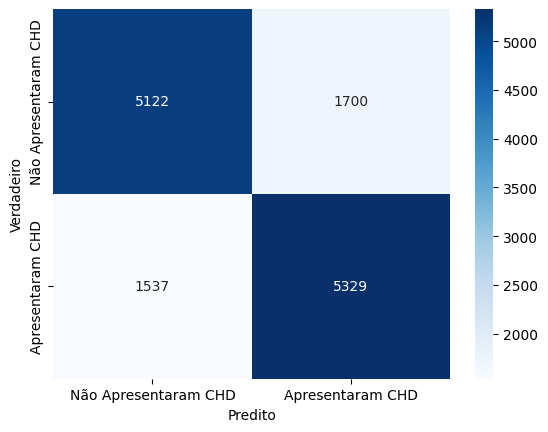

In [17]:
import seaborn as sns

# Plot da matriz de confusão
labels = ['Não Apresentaram CHD', 'Apresentaram CHD']
cm = confusion_matrix(yn_test, yn_pred)
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels, fmt='d')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()

In [18]:
#Exemplo

ex = np.array([26.58,	1,	0,	0,	20.0,	30.0,	0,	1,	9,	0,	1,	1,	1,	8.0,	1,	0, 0]).reshape((1, -1))
print(f'O exemplo resultou em: {modelLogistc.predict(ex)[0]:.0f}')

O exemplo resultou em: 1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
